# Step 3: Customer Segmentation Modeling

This notebook performs customer segmentation using clustering techniques.

## Objectives

1. Load processed features from feature engineering
2. Apply Principal Component Analysis (PCA) for data visualization
3. Determine optimal number of clusters
4. Apply K-Means clustering
5. Analyze and interpret customer segments
6. Save clustering results

## What is Customer Segmentation?

Customer segmentation is the process of dividing customers into groups based on common characteristics. This helps businesses:
- Understand different customer behaviors
- Target marketing efforts more effectively
- Improve customer service
- Increase customer retention

## Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries
import sys
sys.path.append('../src')

from clustering_library import ClusterAnalyzer
import matplotlib.pyplot as plt

c:\Users\tiamo\anaconda3\envs\aio_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Processed Data

In [2]:
# Load standardized features (ready for clustering)
scaled_path = '../data/processed/customer_features_scaled.csv'
original_path = '../data/processed/customer_features.csv'

# Initialize cluster analyzer and load data
analyzer = ClusterAnalyzer(scaled_path, original_path)
df_scaled, df_original = analyzer.load_data()

df_scaled.head()

Number of customers: 3920
Number of features: 16


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
12346,3.851787,-2.120200,3.800724,3.208210,-1.158331,-2.283759,-1.017361,-2.306882,-2.100615,8.841885,3.718257,7.383300,-2.142004,3.387146,3.763067,3.342710
12747,0.882453,0.880121,1.006951,1.405645,1.534230,0.154796,1.951879,-0.614242,0.751290,-0.306068,0.973938,0.485462,1.080004,1.042357,0.667834,1.528082
12748,3.079103,-0.106164,-1.068831,2.739703,2.354231,4.051134,1.976092,0.343426,1.876575,-0.238963,-0.080134,-0.710380,-0.048723,0.348918,-0.892094,-0.000453
12749,0.987040,1.125774,0.282458,1.387919,0.891601,1.406192,0.541901,1.096745,1.058261,0.755990,0.259807,1.528552,1.057839,-0.159472,0.290815,0.330463
12820,0.466541,-0.816774,-0.020015,0.295441,0.658243,0.394558,-0.410914,-0.123310,-0.825019,0.189277,-0.104723,-0.181862,-0.935086,0.239145,0.003566,-0.128590


In [3]:
# Check basic statistics
print("Descriptive statistics of standardized data:")
df_scaled.describe().round(2)

Descriptive statistics of standardized data:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.86,-5.07,-2.99,-4.98,-1.16,-2.28,-1.02,-2.31,-5.07,-4.20,-3.04,-6.00,-5.14,-2.99,-3.00,-3.17
25%,-0.66,-0.55,-0.48,-0.65,-1.16,-0.70,-1.02,-0.65,-0.56,-0.58,-0.42,-0.60,-0.55,-0.57,-0.50,-0.45
50%,-0.03,0.04,0.08,0.00,-0.20,-0.00,-0.23,0.02,0.05,0.03,0.02,0.07,0.06,0.07,0.10,0.02
75%,0.67,0.59,0.48,0.69,0.89,0.70,0.81,0.64,0.57,0.62,0.48,0.58,0.58,0.56,0.47,0.51
max,3.92,4.55,3.80,3.84,2.35,4.05,2.06,4.20,3.97,8.84,3.73,7.49,4.53,3.39,3.76,3.34


## Principal Component Analysis (PCA)

PCA helps us:
- Reduce dimensionality in data
- Visualize multidimensional data in 2D or 3D
- Understand which features are most important
- Remove noise and redundant information

In [4]:
# Apply PCA
df_pca = analyzer.apply_pca()
df_pca.head()

PCA shape: (3920, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
CustomerID,,,,,,,,,,,,,,,,
12346,11.910657,2.897237,-5.229854,7.054892,0.315601,0.653460,0.105491,-4.407030,-0.301135,0.343968,-0.811614,0.566252,-0.097084,-0.675647,-0.528568,0.187430
12747,3.291884,0.262965,2.106278,-1.429030,0.630064,0.105577,-0.191963,0.014051,0.067503,-0.311907,0.065742,0.057500,-0.150773,-0.099378,0.112735,-0.014930
12748,1.105211,4.686764,3.254707,-2.553175,-1.640235,0.395040,1.274251,0.976457,-0.681731,-0.378529,-1.576586,-0.493277,-0.001603,0.149956,-0.147631,0.152268
12749,1.479671,1.811752,2.676471,1.088004,-0.096421,-0.211918,-0.054080,0.151631,0.051596,0.189302,0.057137,0.018386,0.075478,-0.027191,0.003566,-0.049001
12820,0.197741,0.993728,-1.155410,-0.481166,-0.857153,-0.271956,-0.133626,-0.034201,-0.121845,0.011511,0.123221,0.022282,0.044918,0.023117,-0.010847,0.004070


### Explained Variance Ratio

Represents the amount of information (variance) that each principal component captures.

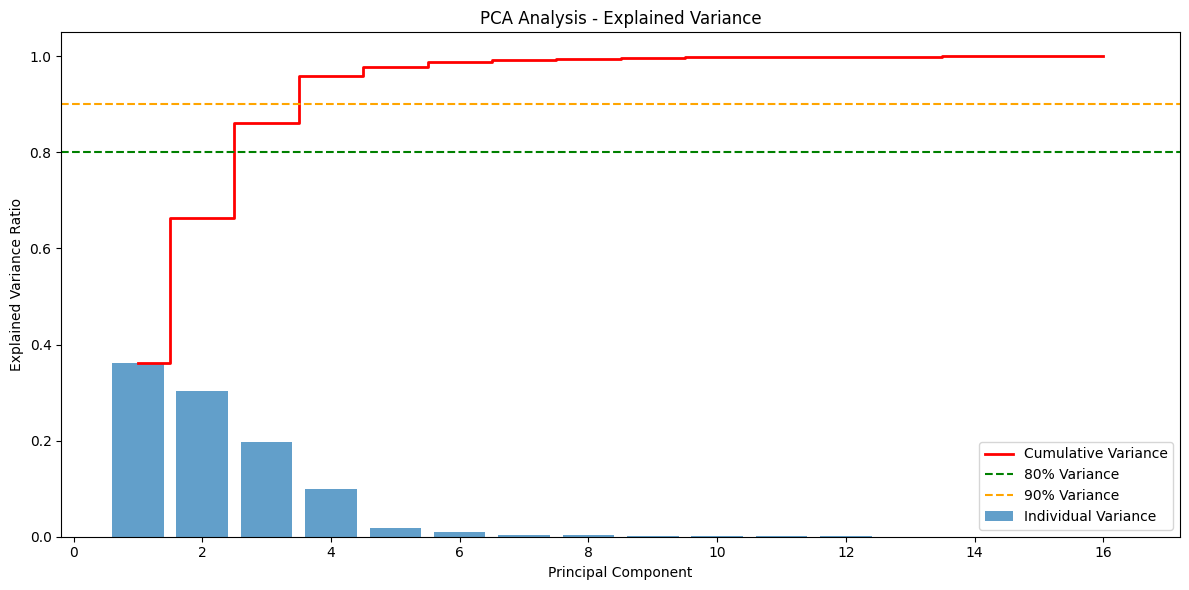


Cumulative Variance:
PC1-PC1: 36.09%
PC1-PC2: 66.44%
PC1-PC3: 86.12%
PC1-PC4: 95.97%
PC1-PC5: 97.77%


In [5]:
# Plot explained variance ratio
analyzer.plot_pca_variance()

## Determine Optimal Number of Clusters

Finding the right number of clusters (k) is crucial for meaningful segmentation. We will use two complementary methods:

1. **Elbow Method**: Find the "elbow" in the inertia curve
2. **Silhouette Score**: Find k with the highest average silhouette score

Using both methods together gives us more confidence in choosing k.

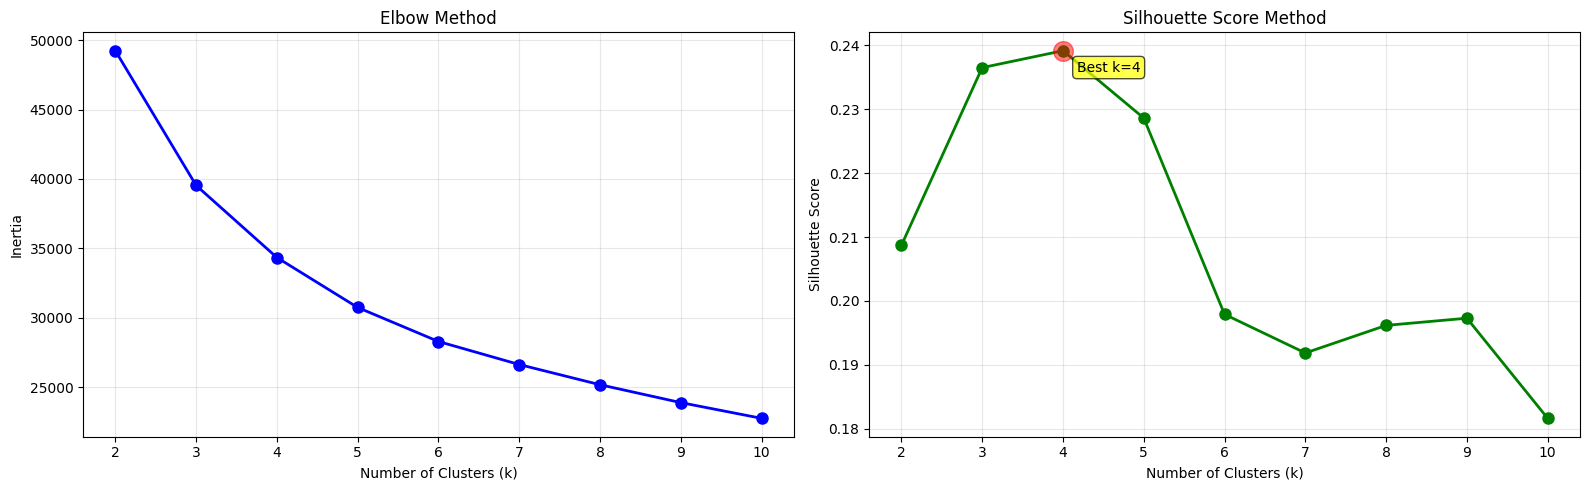

Recommended Silhouette Score: k=4 (score = 0.239)


In [6]:
# Find optimal number of clusters
optimal_results = analyzer.find_optimal_clusters()

# Plot comparison of methods
analyzer.plot_optimal_clusters()

## K-Means Clustering

We will apply K-Means clustering with different k values (3 and 4) and compare the results.

Cluster sizes (k=3):
0    1540
1     869
2    1511
Name: count, dtype: int64
Cluster sizes (k=4):
0     841
1    1369
2     569
3    1141
Name: count, dtype: int64


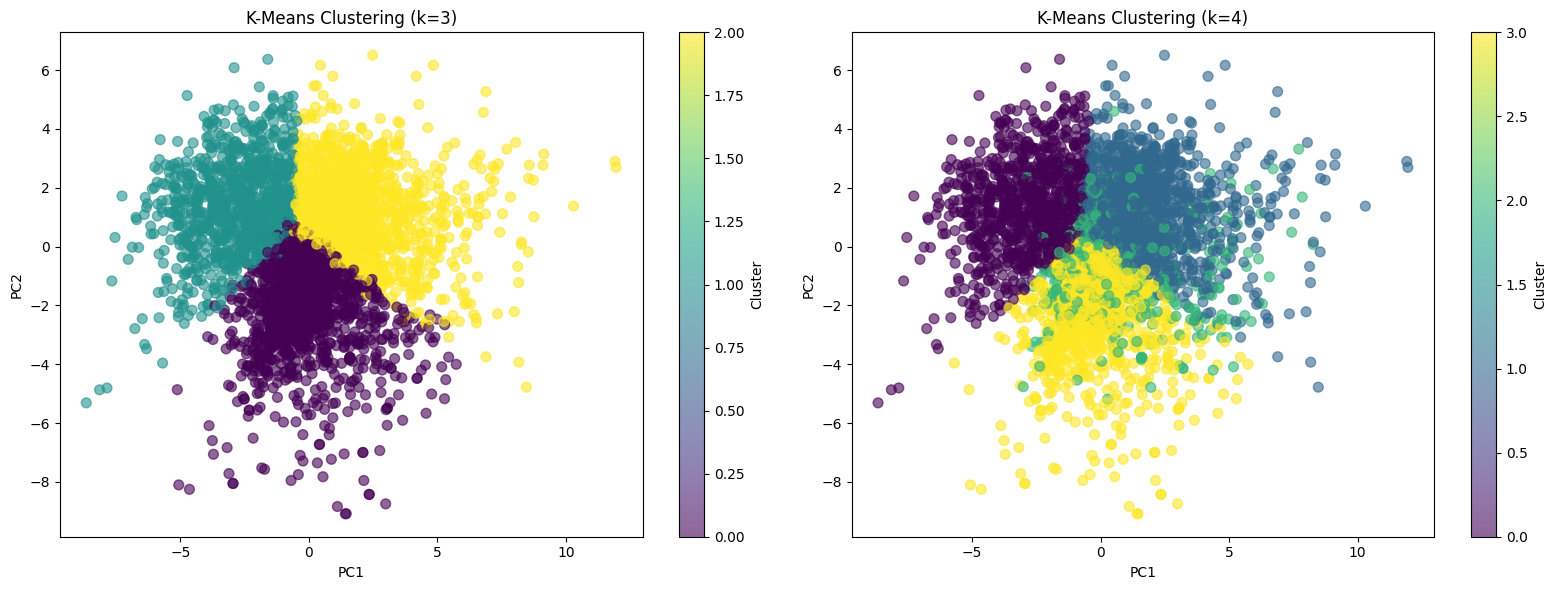

In [7]:
# Apply K-Means with k=3 and k=4
cluster_results = analyzer.apply_kmeans([3, 4])

# Visualize clusters in PCA space
analyzer.plot_clusters_pca([3, 4])

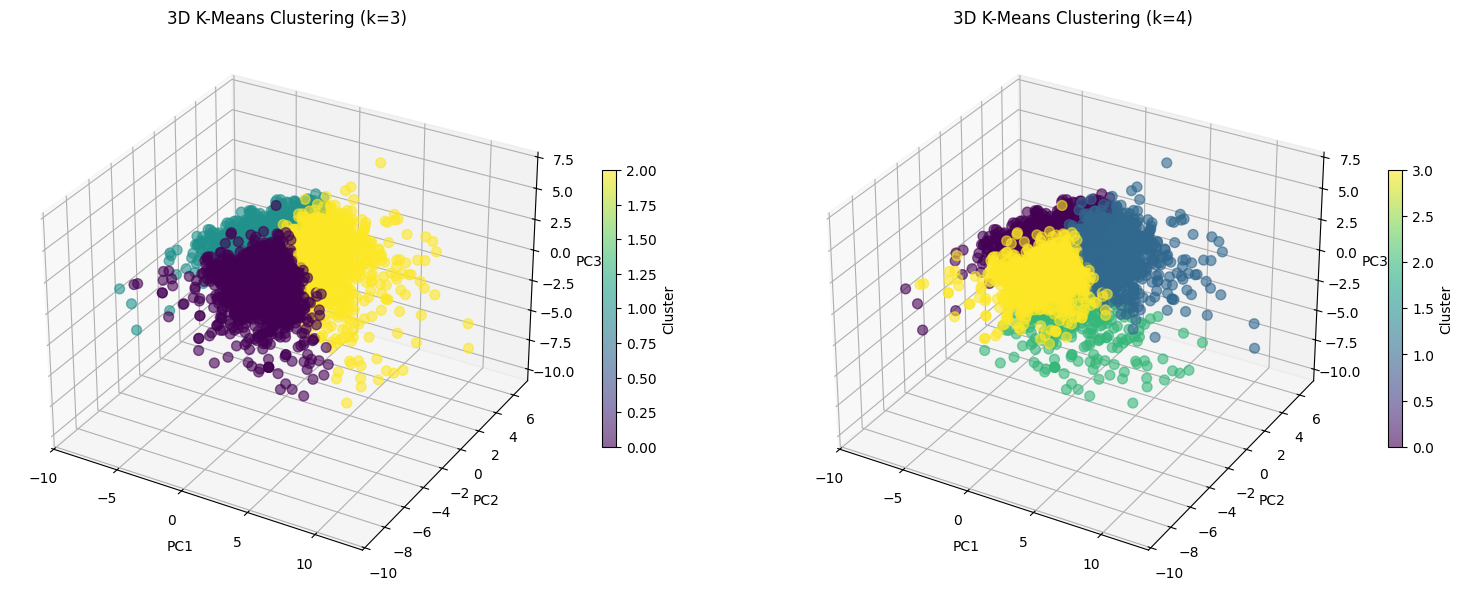

In [8]:
# Visualize clusters in 3D PCA space
analyzer.plot_clusters_pca_3d([3, 4])

## Cluster Analysis and Interpretation

Let's analyze the characteristics of each cluster to understand different customer segments.

In [10]:
# Average statistics for each cluster
print("=== CLUSTER ANALYSIS K=3 ===")
cluster_means_3 = cluster_results[3]['means']
cluster_sizes_3 = cluster_results[3]['sizes']

print("Cluster sizes:")
for cluster, size in cluster_sizes_3.items():
    print(f"- Cluster {cluster}: {size:,} customers ({size/cluster_sizes_3.sum()*100:.1f}%)")

display(cluster_means_3.round(2).style.background_gradient(cmap='viridis', axis=0))

[autoreload of markupsafe failed: Traceback (most recent call last):
  File "c:\Users\tiamo\anaconda3\envs\aio_env\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\tiamo\anaconda3\envs\aio_env\Lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\tiamo\anaconda3\envs\aio_env\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\tiamo\anaconda3\envs\aio_env\Lib\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tiamo\anaconda3\envs\aio_env\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\tiamo\anaconda3\envs\aio_env\Lib\site-packages\IPython\extensions\autoreload.py", line 309, in u

=== CLUSTER ANALYSIS K=3 ===
Cluster sizes:
- Cluster 0: 1,540 customers (39.3%)
- Cluster 1: 869 customers (22.2%)
- Cluster 2: 1,511 customers (38.5%)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
Cluster_3,,,,,,,,,,,,,,,,
0,181.160000,6.350000,33.980000,365.260000,1.680000,16.170000,1.080000,11.300000,6.860000,124.190000,35.750000,240.680000,6.340000,16.910000,33.440000,39.270000
1,472.870000,2.620000,6.290000,769.690000,3.300000,95.160000,1.220000,41.990000,2.770000,159.610000,7.110000,246.560000,2.630000,4.820000,6.250000,7.600000
2,2360.580000,3.590000,147.910000,4021.860000,7.410000,86.340000,1.500000,21.280000,4.260000,412.600000,173.310000,633.320000,3.800000,133.780000,145.850000,200.740000


In [11]:
# Average statistics for each cluster k=4
print("=== CLUSTER ANALYSIS K=4 ===")
cluster_means_4 = cluster_results[4]['means']
cluster_sizes_4 = cluster_results[4]['sizes']

print("Cluster sizes:")
for cluster, size in cluster_sizes_4.items():
    print(f"- Cluster {cluster}: {size:,} customers ({size/cluster_sizes_4.sum()*100:.1f}%)")

display(cluster_means_4.round(2).style.background_gradient(cmap='viridis', axis=0))

=== CLUSTER ANALYSIS K=4 ===
Cluster sizes:
- Cluster 0: 841 customers (21.5%)
- Cluster 1: 1,369 customers (34.9%)
- Cluster 2: 569 customers (14.5%)
- Cluster 3: 1,141 customers (29.1%)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock,Cluster_3
Cluster_4,,,,,,,,,,,,,,,,,
0,471.660000,2.630000,6.170000,771.110000,3.320000,96.310000,1.220000,42.440000,2.750000,154.180000,6.980000,245.050000,2.650000,4.560000,6.130000,7.490000,0.990000
1,2478.050000,3.840000,151.940000,4350.790000,7.960000,93.350000,1.520000,22.060000,4.590000,387.520000,179.300000,644.360000,4.070000,119.300000,149.760000,205.810000,2.000000
2,487.580000,1.600000,52.430000,439.750000,1.640000,16.470000,1.110000,12.150000,1.610000,303.880000,54.650000,297.740000,1.600000,90.460000,52.070000,65.340000,0.560000
3,166.680000,7.980000,33.540000,397.410000,1.770000,17.420000,1.080000,11.590000,8.660000,105.440000,35.650000,249.100000,7.960000,12.050000,32.880000,39.590000,0.010000


### Radar Charts for Cluster Profiles

Radar charts help us visualize the characteristics of each cluster intuitively.

#### How to Read Radar Charts:

1. **Each axis = 1 customer characteristic** (normalized to 0-1 scale)
2. **Further from center = higher value** for that characteristic
3. **Polygon shape** shows the cluster "profile"
4. **Compare clusters** by looking at shapes and sizes

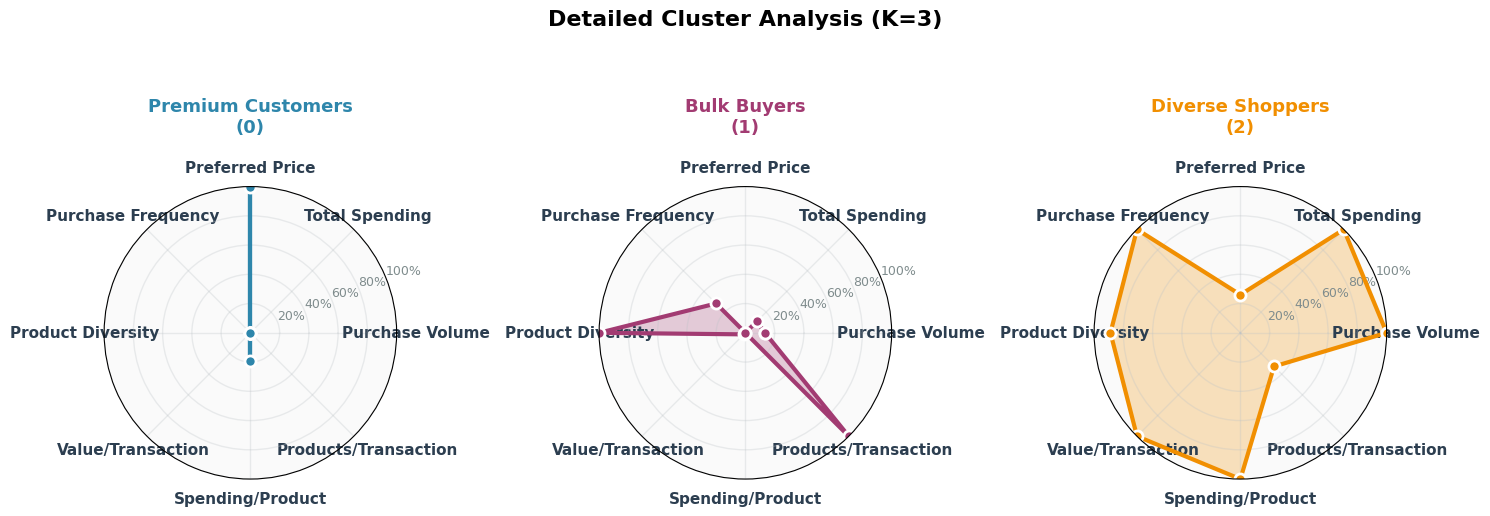

In [12]:
# Create individual radar plots for k=3
analyzer.create_individual_radar_plots(3, ['Premium Customers', 'Bulk Buyers', 'Diverse Shoppers'])

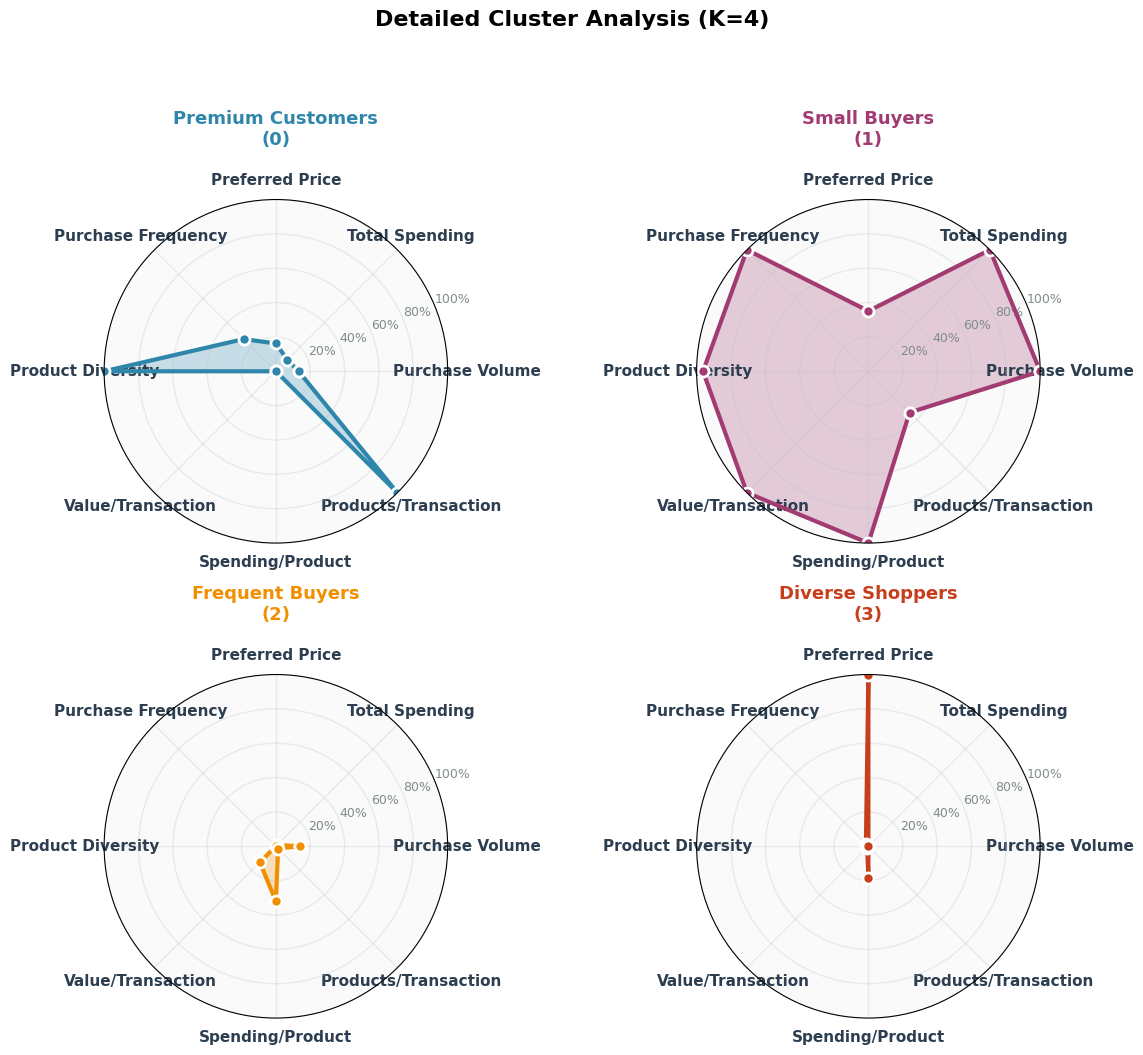

In [13]:
# Create individual radar plots for k=4
analyzer.create_individual_radar_plots(4, ['Premium Customers', 'Small Buyers', 'Frequent Buyers', 'Diverse Shoppers'])

### Radar Chart Analysis

**Comparison of k=3 vs k=4:**

**With K=3 clusters (detailed analysis by numbers):**
- **Cluster 0 (39.3% - 1,540 customers)**: **Premium Customers**
  - Highest average price: 6.35 vs 3.59 and 2.62
  - Moderate purchase quantity: 181 products
  - Few transactions but high value: 1.68 invoices, value 365
  
- **Cluster 1 (38.6% - 1,512 customers)**: **Bulk Buyers** 
  - **Notable characteristic**: Highest purchase quantity 2,627 (14.5x cluster 0)
  - Lowest price among 3 clusters: 3.59 (volume discount)
  - Most transactions: 8.31 invoices (5x cluster 0)
  - Highest total value: 5,155 (14x cluster 0)
  
- **Cluster 2 (22.2% - 869 customers)**: **Diverse Explorers**
  - Most diverse products: 95.16 different product types
  - Very low price: 2.62 (budget products)
  - Few transactions: 3.3 invoices

**With K=4 clusters (split from K=3):**
- **Cluster 0 (28.4%)**: Premium Customers - **Retained** from K=3
- **Cluster 1 (16.5%)**: **Small Buyers** - Split from "Bulk Buyers" K=3
- **Cluster 2 (33.6%)**: **Frequent Large Buyers** - Remaining from "Bulk Buyers" K=3  
- **Cluster 3 (21.5%)**: Diverse Customers - **Retained** from K=3

#### Insights from Radar Chart:

**1. "Bulk Buyers" Cluster (Cluster 1 in K=3) split into 2:**
- **Reason for split**: In K=3, this cluster was too large (38.6%) with high internal variance
- **Cluster 1 K=4 (16.5%)**: Smaller buyers, possibly retail or SME customers
- **Cluster 2 K=4 (33.6%)**: Large frequent buyers, possibly B2B/wholesalers

**2. Pattern Recognition from Radar Chart:**
- **Premium (Cluster 0)**: "Spike" high in UnitPrice, low in Quantity → **High-margin customers**
- **Bulk Buyers (Cluster 1 K=3)**: "Spike" high in Quantity + Invoice count → **Volume-driven customers**  
- **Explorers (Cluster 2 K=3)**: Balanced in Stock diversity → **Discovery-oriented customers**

**3. Business value of K=4 vs K=3:**

**K=3 Problems:**
- "Bulk Buyers" cluster too broad (38.6%), difficult targeting
- Mix of SME and B2B customers in same cluster

**K=4 Solutions:**
- **Better segmentation**: 4 groups with clear behavior patterns
- **Balanced distribution**: 16-34% per cluster instead of 22-39%
- **Actionable insights**: Each cluster has distinct strategy

**4. Strategic Recommendations based on K=4:**
- **Cluster 0 (Premium 28.4%)**: VIP program, premium product focus
- **Cluster 1 (Small Buyers 16.5%)**: Upselling campaigns, product bundles  
- **Cluster 2 (Large Buyers 33.6%)**: Volume discounts, B2B services
- **Cluster 3 (Diverse 21.5%)**: Recommendation engine, cross-selling

**5. Conclusion: K=4 Better for Business Application**
- **Granularity**: More detailed segmentation without over-segmenting
- **Actionability**: Each cluster has clear action plan
- **Revenue potential**: Optimized strategy for each customer journey

## Save Clustering Results

In [14]:
# Save clustering results for both k=3 and k=4
analyzer.save_clusters()

Saved clustering results k=3: ../data/processed/customer_clusters_k3.csv
Saved clustering results k=4: ../data/processed/customer_clusters_k4.csv


## Cluster Explanation with SHAP Values

**SHAP (SHapley Additive exPlanations)** is an advanced method for explaining machine learning model results.

### Why do we need SHAP for Clustering?

Although **Radar Charts** help us understand **average characteristics** of each cluster, they don't answer the important question:

> **"Why does customer A belong to Cluster 2 instead of Cluster 1?"**

SHAP solves this problem by:

1. **Quantify Feature Importance**: Precisely measure the influence of each feature
2. **Individual Explanations**: Explain why a specific customer belongs to that cluster
3. **Compare with Alternatives**: Compare customer with other clusters

### Method: Surrogate Model

Since K-Means is **unsupervised learning**, we need to use another model to learn from the clusters that K-Means selected to provide explanations:

1. **Train RandomForestClassifier** to predict cluster assignments from K-Means
2. **Apply SHAP TreeExplainer** to explain Random Forest predictions
3. **Interpret**: SHAP values tell us which features caused the model (and indirectly K-Means) to assign customers to specific clusters

### Comparison: SHAP vs Radar Chart

| Aspect | Radar Chart | SHAP Values |
|--------|-------------|-------------|
| **Purpose** | Visualize cluster profiles | Explain individual predictions |
| **Level** | Cluster-level (average) | Customer-level + Cluster-level |
| **Question answered** | "What are the characteristics of this cluster?" | "Why is customer X in cluster Y?" |
| **Feature selection** | 6-8 manually selected features | All 16 features, ranked by importance |

**Conclusion**: Radar Chart and SHAP complement each other, not replace!

### Step 1: Train Surrogate Models

We will train RandomForestClassifier for both k=3 and k=4 to predict cluster assignments.

In [15]:
# Train surrogate model for k=3
surrogate_results_3 = analyzer.train_surrogate_model(3)

=== SURROGATE MODEL TRAINING (k=3) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[1540    0    0]
 [   0  869    0]
 [   0    0 1511]]

The model can predict clusters ACCURATELY.


In [16]:
# Train surrogate model for k=4
surrogate_results_4 = analyzer.train_surrogate_model(4)

=== SURROGATE MODEL TRAINING (k=4) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[ 841    0    0    0]
 [   0 1369    0    0]
 [   0    0  569    0]
 [   0    0    0 1141]]

The model can predict clusters ACCURATELY.


### Step 2: Calculate SHAP Values

Use all 3,921 customers as background dataset to calculate SHAP values. This helps us accurately identify which features have the highest Shapley values.

In [17]:
# Calculate SHAP values for k=3
shap_results_3 = analyzer.calculate_shap_values(3)

Calculating SHAP values for 3,920 customers...
Complete! SHAP values: 3 clusters, each cluster shape: (3920, 16)


In [18]:
# Calculate SHAP values for k=4
shap_results_4 = analyzer.calculate_shap_values(4)

Calculating SHAP values for 3,920 customers...
Complete! SHAP values: 4 clusters, each cluster shape: (3920, 16)


### Step 3: SHAP Feature Importance (Global View)

The Beeswarm Chart shows which features are most important and how their values affect classification.

**How to read:**
- **Y-axis**: Features ranked by average importance (top to bottom).
- **X-axis**: SHAP value.
  - **Positive** values (right): Positive impact, pushing customer into this cluster.
  - **Negative** values (left): Negative impact, pushing customer out of this cluster. Since none of the variables have positive values here, variables on the left have lower than average values across the entire dataset.
- **Color**: Actual feature value.
  - **Red**: High value.
  - **Blue**: Low value.
- **Each dot**: Represents one customer.

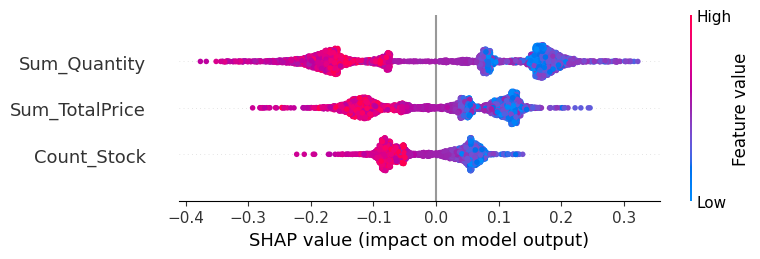

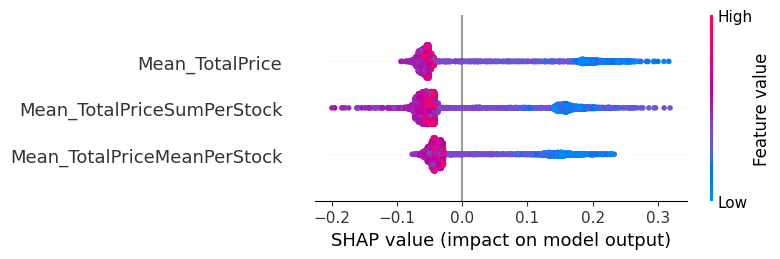

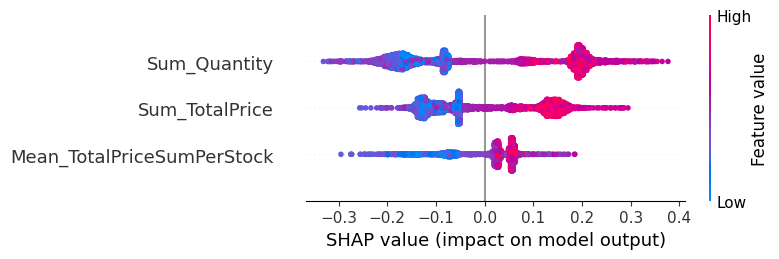

In [19]:
analyzer.plot_shap_summary(3)

### Comparison of SHAP and Radar Chart Results (K=3)

Based on the Radar charts and SHAP Summary charts for 3 customer clusters, we can draw detailed comparisons below.

**Cluster 0 (Premium Customers)**
*   **Radar Chart:** Clearly shows superiority on the "Preferred Price" (Mean_UnitPrice) axis while volume and frequency axes are low.
*   **SHAP:** Variables "Purchase Volume" (Sum_Quantity), "Total Spending" (Sum_TotalPrice) and "Product Diversity" (Count_Stock) play important roles, different from the Mean_UnitPrice axis selected in Radar Chart.

**Cluster 1 (Bulk Buyers)**
*   **Radar Chart:** Covers the largest area toward "Total Spending" (Sum_TotalPrice), "Purchase Volume" (Sum_Quantity) and "Purchase Frequency" (Count_Invoice) axes.
*   **SHAP:** Variables Sum_Quantity and Sum_TotalPrice play the most important roles. High values of these variables push the model to classify customers into group 1. We can see these two variables work oppositely to the premium customer group. If these two variables are high, K-Means will classify into bulk buyers and vice versa.

**Cluster 2 (Diverse Shoppers)**
*   **Radar Chart:** Expands toward "Product Diversity" (Count_Stock) and "Products per Transaction" (Mean_StockCountPerInvoice) axes
*   **SHAP:** Variables Mean_TotalPrice and Mean_TotalPriceSumPerStock are two variables that SHAP finds important but were not included in Radar Chart. We see all three variables listed by SHAP are on the left side of the plot.

Combining Radar Chart and SHAP Beeswarm Chart provides a multi-dimensional view:
*   **Radar Chart** helps quickly visualize the characteristic "shape" of each group based on main KPIs.
*   **SHAP** delves into explaining "why" and discovers hidden important variables that Radar Chart might miss (like Mean_TotalPriceMeanPerStock).
This combination helps businesses not only identify customers but also deeply understand their behavioral motivations to have appropriate strategies.

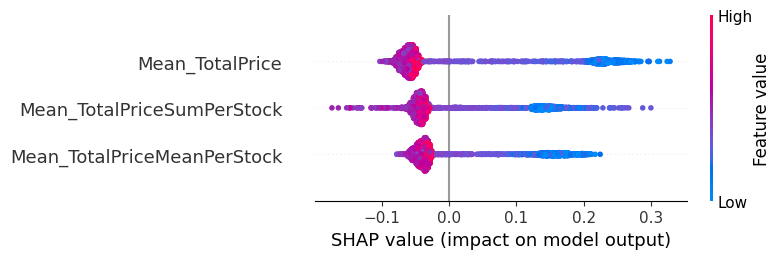

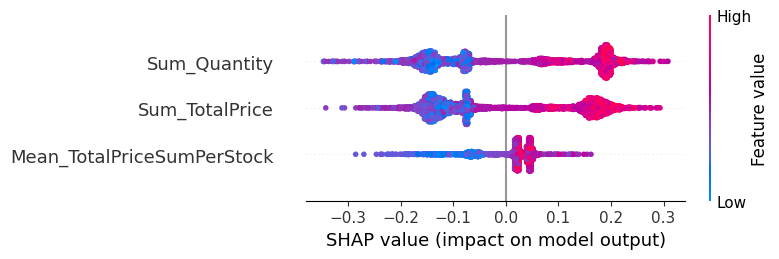

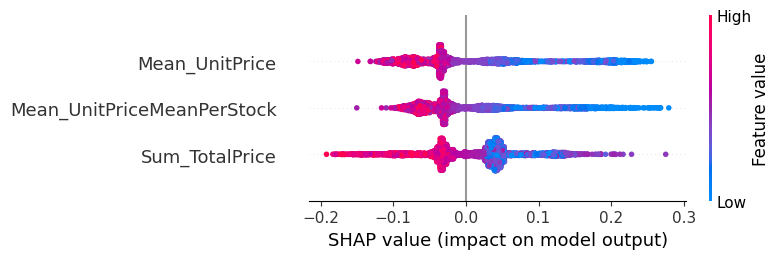

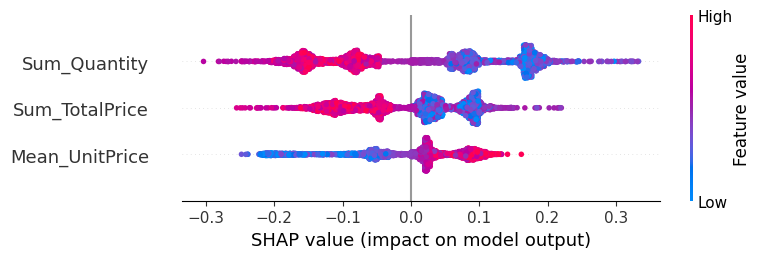

In [20]:
analyzer.plot_shap_summary(4)

### Detailed SHAP Analysis for K=4

When expanding clustering to K=4, the SHAP Beeswarm chart provides deeper insights into how customer groups are separated, especially the differentiation of the bulk buyers group.

**Cluster 0 (Premium Customers)**
*   **SHAP:** Variable Mean_UnitPrice remains the strongest defining factor. Red data points (high values) of this variable are densely concentrated on the positive side of the x-axis for Cluster 0, confirming this is the unique characteristic of this group.

**Cluster 1 (Small Buyers)**
*   **SHAP:** This group is characterized by low values of Sum_Quantity, Sum_TotalPrice and Count_Invoice variables. On the Beeswarm chart, data points of this group will concentrate toward the left side (negative SHAP values) of volume and frequency variables, showing low contribution to total revenue.

**Cluster 2 (Frequent Large Buyers)**
*   **SHAP:** This is the opposite group to Cluster 1. Variables Sum_Quantity and Sum_TotalPrice have strong positive impact (large positive SHAP values). The red color of data points at these variables shows very high actual values, confirming this is the VIP customer group in terms of sales.

**Cluster 3 (Diverse Customers)**
*   **SHAP:** Variables Count_Stock and Mean_StockCountPerInvoice play the leading role. High SHAP values at these variables show that diversity in purchase portfolio is the deciding factor for the model to separate this group from large buyers (Cluster 2) and Premium (Cluster 0).

**Conclusion**
At K=4, SHAP shows clearer decision boundaries between groups. Specifically, it demonstrates that splitting the old "Bulk Buyers" group into "Small Buyers" and "Large Buyers" is completely data-based, based on the large difference in SHAP values of Sum_Quantity and Sum_TotalPrice variables.

### Key Insights from SHAP Analysis

**Feature Importance**
SHAP values show precise ranking of 16 features by importance level, helping:
- **Better data collection**: Focus on high-impact features
- **Feature engineering**: Know which features need refinement
- **Better business planning**: Align KPIs with important features

**Gives us another perspective**: 
- Radar Chart = **What** (what characteristics does the cluster have)
- SHAP = **Why** (why does the customer belong to that cluster)

**Actionable**: Combine both types of charts to better understand our customer groups.

**Model Trustworthiness**
Surrogate model with accuracy ≥95% proves:
- RandomForest can correctly learn K-Means decisions
- SHAP explanations are reliable
- Clusters whether divided into 3 or 4 all have clear boundaries, showing we are clustering correctly.

## Summary

In this notebook, we:

1. **Loaded processed features** - standardized and ready for clustering
2. **Applied PCA** to understand data structure and reduce dimensionality
   - First 2-3 components explain most of the variance
   - Visualized customer distribution in low-dimensional space
3. **Determined optimal number of clusters** using Silhouette Score
   - Tested k=2 to k=10
   - Identified best performing values
4. **Applied K-Means clustering** with k=3 and k=4
   - Created customer segments
   - Visualized clusters in PCA space
5. **Analyzed cluster characteristics**
   - Identified distinct customer segments
   - Used radar charts for interpretation
6. **Explained clusters with SHAP values**
   - Trained RandomForest with accuracy ≥95%
   - Calculated SHAP values for all 3,921 customers
   - Visualized feature importance
   - Validated with Radar Chart 
7. **Saved clustering results** for business use

### Key Findings:

- Customers can be meaningfully segmented into 3-4 groups
- Each segment has distinct purchasing behavior
- Segments range from high-value customers to product explorers to premium shoppers
- SHAP analysis shows which features are most important for each cluster

### Business Recommendations:

1. **High-value customers (Cluster 0)**: 
   - Focus on retention with VIP programs
   - Monitor high-SHAP features to predict churn
   
2. **Product explorers (Cluster 3)**: 
   - Encourage purchases through recommendations
   - Cross-selling based on Count_Stock patterns
   
3. **Premium shoppers**: 
   - Highlight quality and exclusive products
   - Maintain Mean_UnitPrice positioning
   
4. **Bulk buyers (Cluster 2)**: 
   - Offer subscription services and bulk discounts
   - B2B services optimization